In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('Amazon Sale Report.csv')

In [24]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [25]:
#dropping unwanted column
data.drop(columns='index',inplace=True)

In [26]:
data.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-nul

In [28]:
#dropping unwanted column
data.drop(columns='Unnamed: 22',inplace=True)

In [29]:
#checking for null values
data.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64

Data Preprocessing

In [30]:
data['Courier Status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [31]:
data['Courier Status'] = data['Courier Status'].fillna('pending')

In [32]:
data['Courier Status'].value_counts()

Courier Status
Shipped      109487
pending        6872
Unshipped      6681
Cancelled      5935
Name: count, dtype: int64

In [33]:
data['currency'] = data['currency'].fillna('INR')

In [34]:
data['Amount']

0          647.62
1          406.00
2          329.00
3          753.33
4          574.00
           ...   
128970     517.00
128971     999.00
128972     690.00
128973    1199.00
128974     696.00
Name: Amount, Length: 128975, dtype: float64

In [35]:
data['Amount'].median()

605.0

In [36]:
data['Amount'] = data['Amount'].fillna(data['Amount'].median())

In [37]:
data.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64

In [38]:
data['fulfilled-by']

0         Easy Ship
1         Easy Ship
2               NaN
3         Easy Ship
4               NaN
            ...    
128970          NaN
128971          NaN
128972          NaN
128973          NaN
128974          NaN
Name: fulfilled-by, Length: 128975, dtype: object

In [39]:
data['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [40]:
data['fulfilled-by'] = data['fulfilled-by'].fillna('Easy Ship')

In [41]:
data.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by              0
dtype: int64

In [42]:
data.drop(columns='promotion-ids',inplace=True)

In [43]:
data.dropna(inplace=True)

In [44]:
data.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [45]:
data.shape

(128942, 21)

In [46]:
data.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,pending,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Easy Ship
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,pending,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Easy Ship


In [47]:
data.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'fulfilled-by'],
      dtype='object')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128942 entries, 0 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128942 non-null  object 
 1   Date                128942 non-null  object 
 2   Status              128942 non-null  object 
 3   Fulfilment          128942 non-null  object 
 4   Sales Channel       128942 non-null  object 
 5   ship-service-level  128942 non-null  object 
 6   Style               128942 non-null  object 
 7   SKU                 128942 non-null  object 
 8   Category            128942 non-null  object 
 9   Size                128942 non-null  object 
 10  ASIN                128942 non-null  object 
 11  Courier Status      128942 non-null  object 
 12  Qty                 128942 non-null  int64  
 13  currency            128942 non-null  object 
 14  Amount              128942 non-null  float64
 15  ship-city           128942 non-null  ob

In [49]:
#changing data types of Date column
data['Date'] = pd.to_datetime(data['Date'])

In [50]:
data['ship-postal-code'] = data['ship-postal-code'].astype('int')

In [51]:
#Column renaming
data.rename(columns={'Qty':'Quantity'},inplace=True)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128942 entries, 0 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128942 non-null  object        
 1   Date                128942 non-null  datetime64[ns]
 2   Status              128942 non-null  object        
 3   Fulfilment          128942 non-null  object        
 4   Sales Channel       128942 non-null  object        
 5   ship-service-level  128942 non-null  object        
 6   Style               128942 non-null  object        
 7   SKU                 128942 non-null  object        
 8   Category            128942 non-null  object        
 9   Size                128942 non-null  object        
 10  ASIN                128942 non-null  object        
 11  Courier Status      128942 non-null  object        
 12  Quantity            128942 non-null  int64         
 13  currency            128942 non-nul

Data visualization

Histogram of Sales Amount

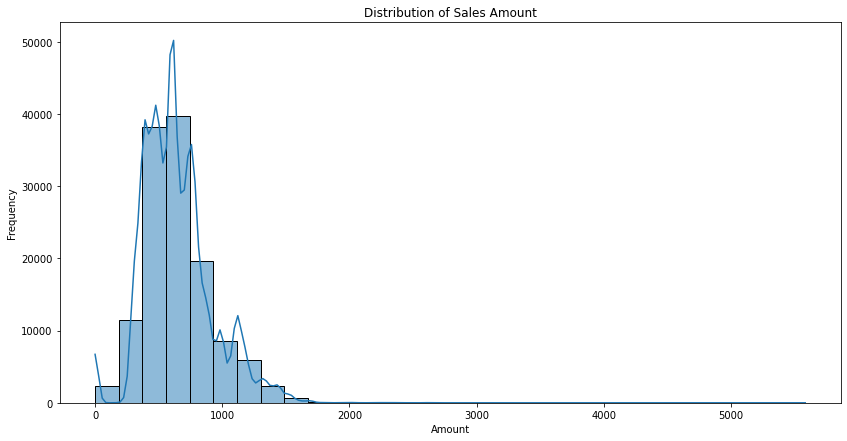

In [53]:
plt.figure(figsize=(14, 7))
sns.histplot(data['Amount'], bins=30, kde=True)
plt.title('Distribution of Sales Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Sales distribution by product category

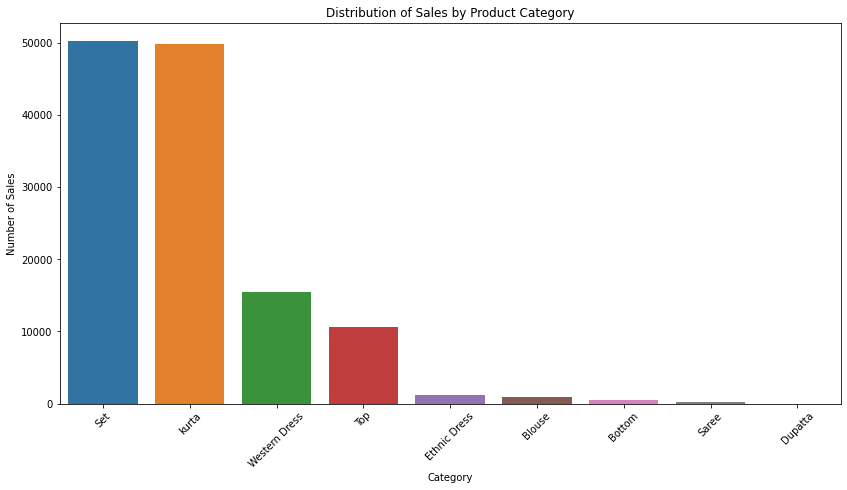

In [54]:
plt.figure(figsize=(14, 7))
sns.countplot(data=data, x='Category', order=data['Category'].value_counts().index)
plt.title('Distribution of Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

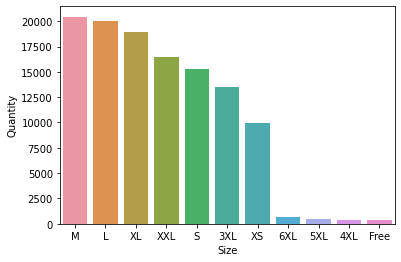

In [55]:
new_data = data.groupby(['Size'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
ax = sns.barplot(x='Size', y='Quantity', data=new_data)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128942 entries, 0 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128942 non-null  object        
 1   Date                128942 non-null  datetime64[ns]
 2   Status              128942 non-null  object        
 3   Fulfilment          128942 non-null  object        
 4   Sales Channel       128942 non-null  object        
 5   ship-service-level  128942 non-null  object        
 6   Style               128942 non-null  object        
 7   SKU                 128942 non-null  object        
 8   Category            128942 non-null  object        
 9   Size                128942 non-null  object        
 10  ASIN                128942 non-null  object        
 11  Courier Status      128942 non-null  object        
 12  Quantity            128942 non-null  int64         
 13  currency            128942 non-nul

Courier Status distribution

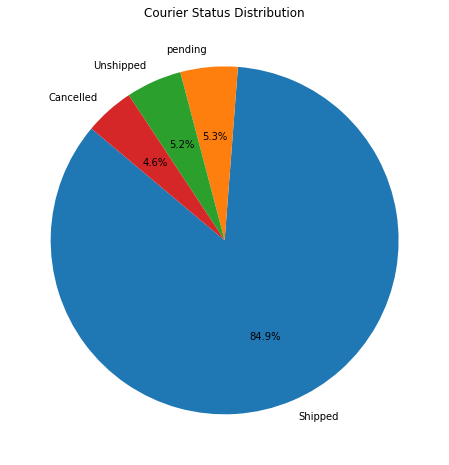

In [57]:
courier_status_counts = data['Courier Status'].value_counts()
plt.figure(figsize=(8, 8))
courier_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Courier Status Distribution')
plt.ylabel('')
plt.show()

Sales amount by courier status

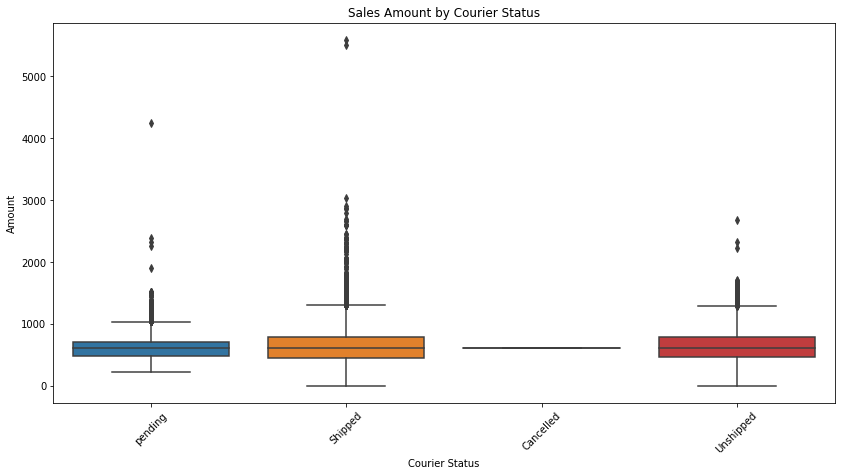

In [58]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Courier Status', y='Amount')
plt.title('Sales Amount by Courier Status')
plt.xlabel('Courier Status')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

In [59]:
data['Courier Status'].value_counts()

Courier Status
Shipped      109461
pending        6869
Unshipped      6679
Cancelled      5933
Name: count, dtype: int64

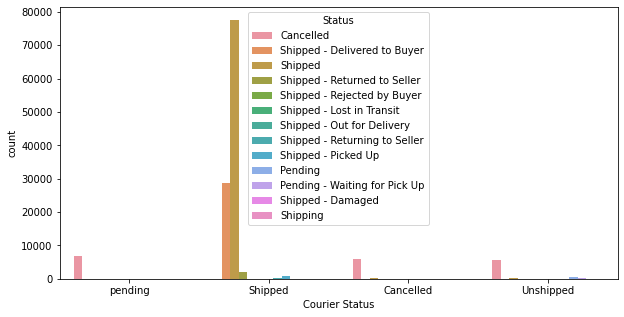

In [60]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=data, x='Courier Status',hue= 'Status')
plt.show()

Sales Distribution by State

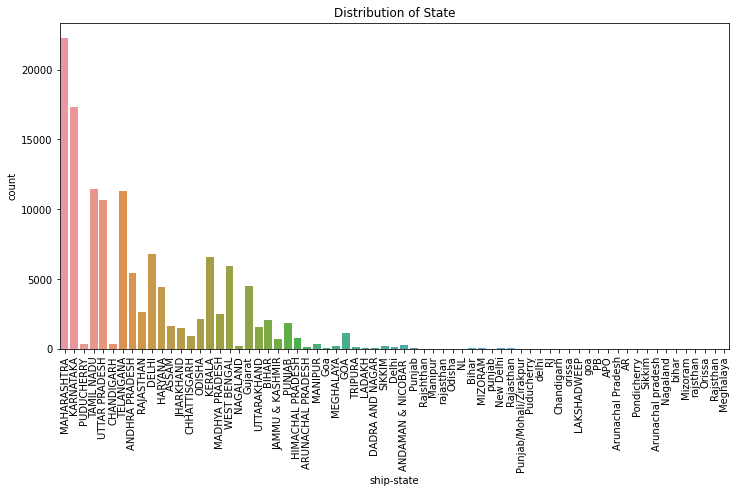

In [61]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

Top 10 state with most orders

In [62]:
top_10_state = data['ship-state'].value_counts().head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

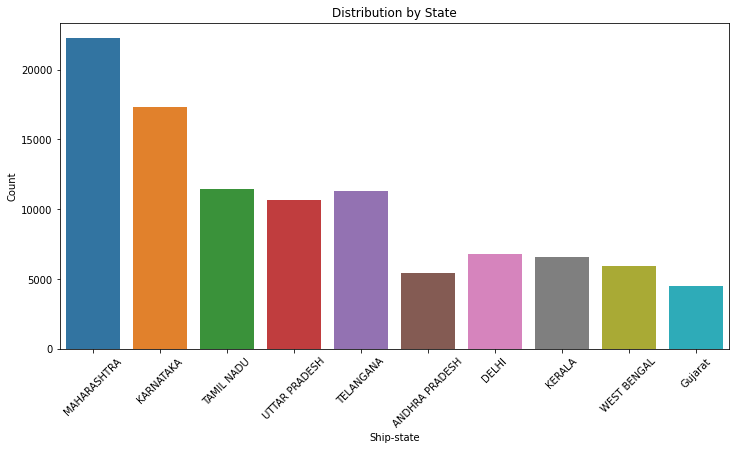

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(data=data[data['ship-state'].isin(top_10_state.index)],x='ship-state')
plt.title('Distribution by State')
plt.xlabel('Ship-state')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show